In [5]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()  # for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('driver-data.csv')
print (data.shape)
print (data.head)

(4000, 3)
<bound method NDFrame.head of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>


In [6]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [7]:
data.sample(5)

,id,mean_dist_day,mean_over_speed_perc
1406,3423313305,37.21,5
1950,3423310674,44.85,2
2626,3423313085,70.32,4
1320,3423313730,57.78,5
3064,3423310712,48.19,6


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [9]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [10]:
data.id.nunique()

4000

In [11]:
data.mean_dist_day.nunique()

2920

In [12]:
data.mean_dist_day.value_counts(dropna=False)

mean_dist_day
55.64     7
52.11     6
51.91     6
47.95     5
57.20     5
         ..
36.93     1
50.35     1
47.96     1
48.31     1
168.03    1
Name: count, Length: 2920, dtype: int64

In [13]:
data.mean_over_speed_perc.nunique()

96

In [14]:
data.mean_over_speed_perc.value_counts(dropna=False)

mean_over_speed_perc
5     553
6     524
4     503
7     366
3     353
     ... 
92      1
69      1
54      1
48      1
73      1
Name: count, Length: 96, dtype: int64

In [15]:
data.isna()

,id,mean_dist_day,mean_over_speed_perc
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3995,False,False,False
3996,False,False,False
3997,False,False,False
3998,False,False,False


In [16]:
newdata = data.loc[:,['mean_dist_day','mean_over_speed_perc']]
newdata.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


<Axes: >

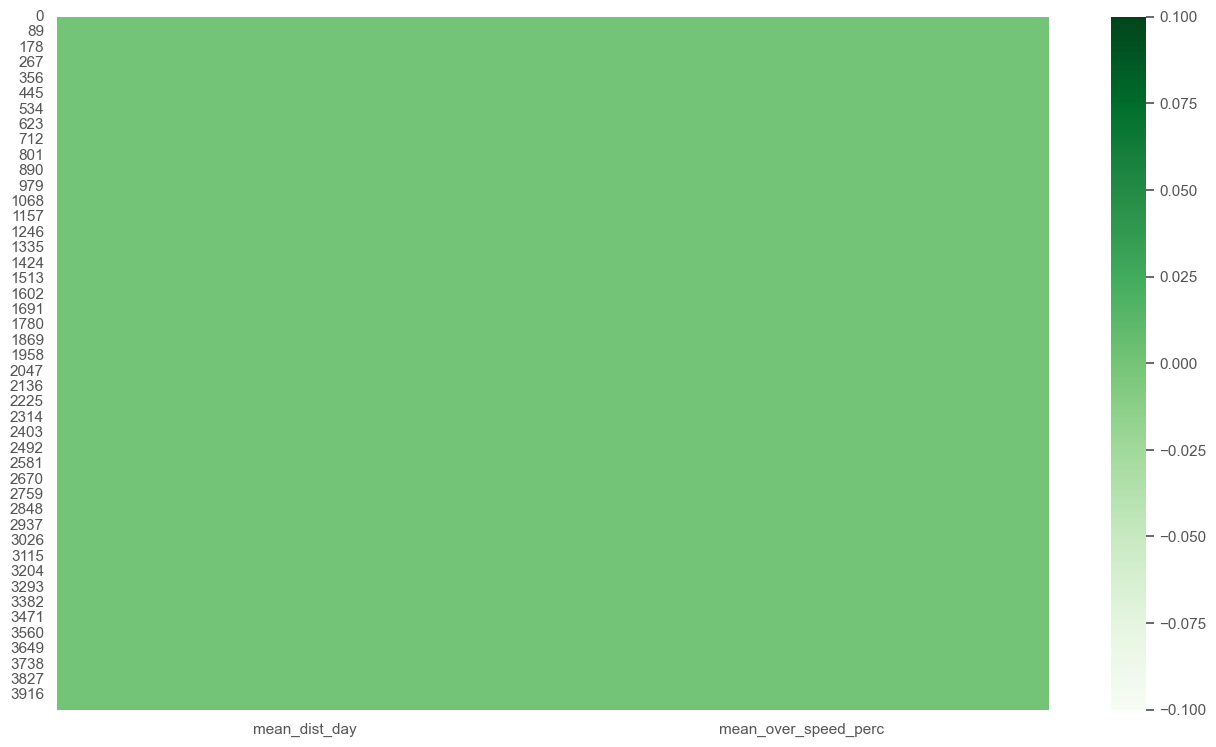

In [17]:
sns.heatmap(newdata.isna(),cmap = 'Greens')

<Axes: >

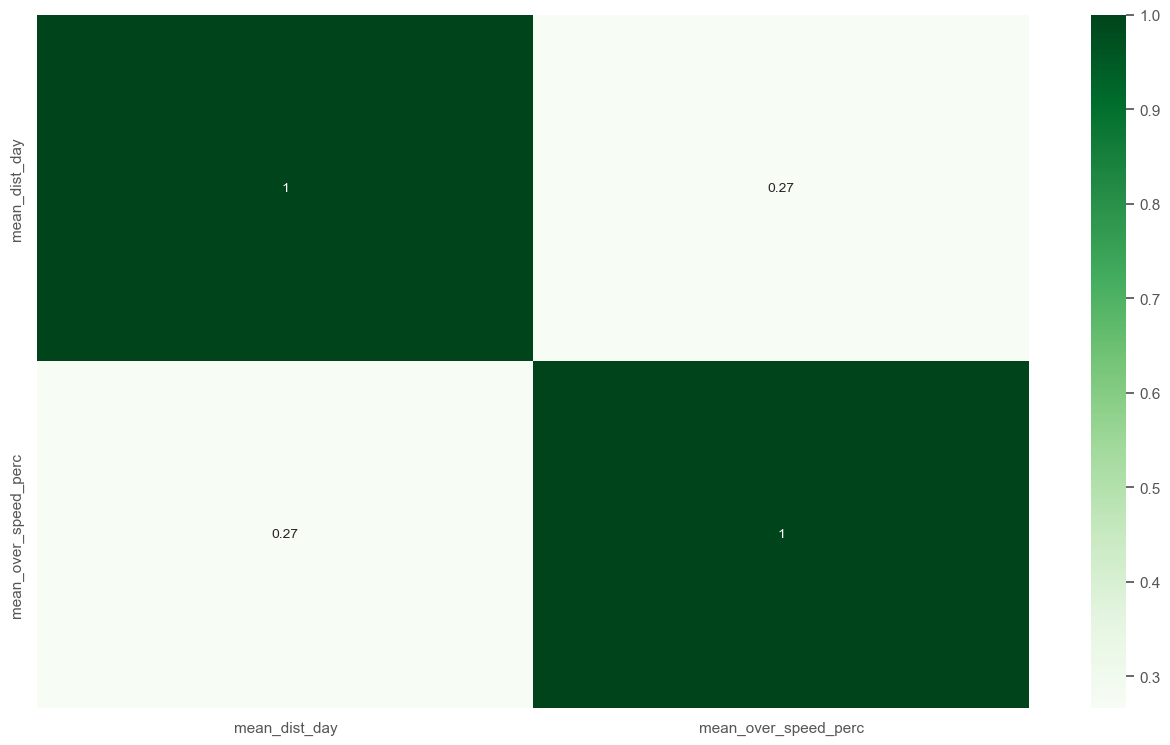

In [18]:
sns.heatmap(newdata.corr(),cmap='Greens',annot=True)

<Axes: >

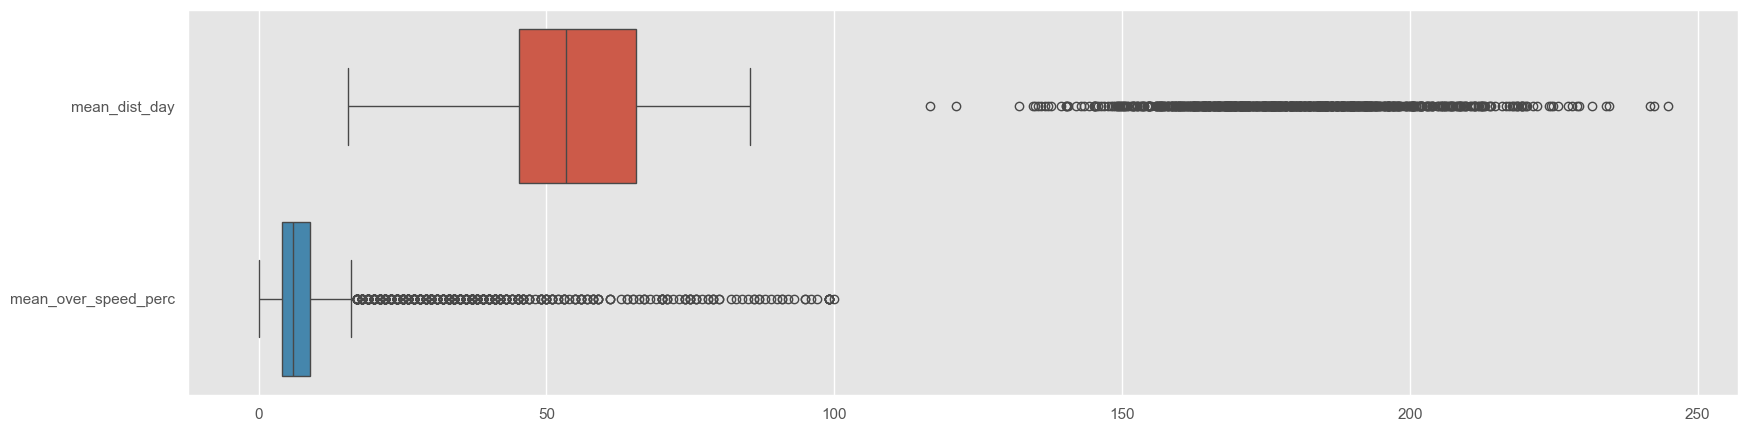

In [19]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=newdata, orient='h')

In [20]:
newdata.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041522,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [21]:
newdata[newdata['mean_dist_day'] == 0.0].count()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [22]:
newdata[newdata['mean_over_speed_perc'] == 0.0].count()

mean_dist_day           23
mean_over_speed_perc    23
dtype: int64

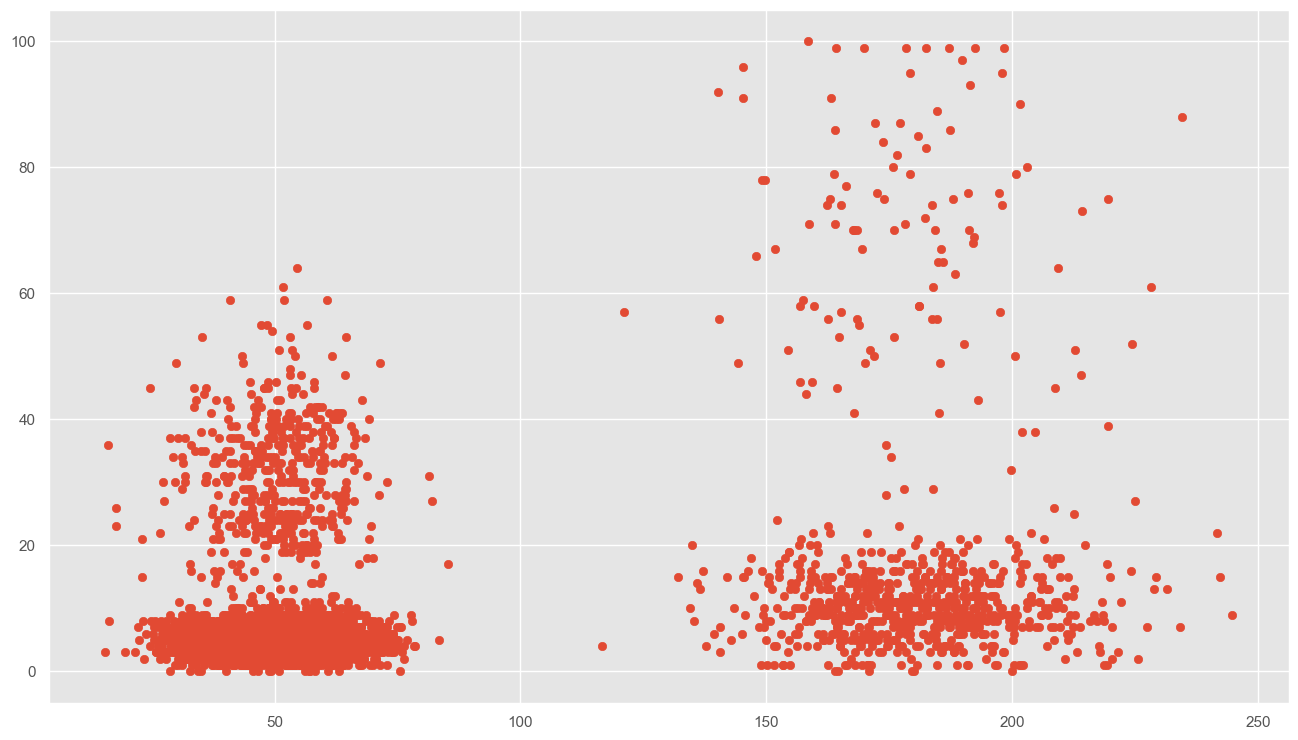

In [23]:
X1=newdata.loc[:,['mean_dist_day']]
X2=newdata.loc[:,['mean_over_speed_perc']]
plt.scatter(X1,X2)

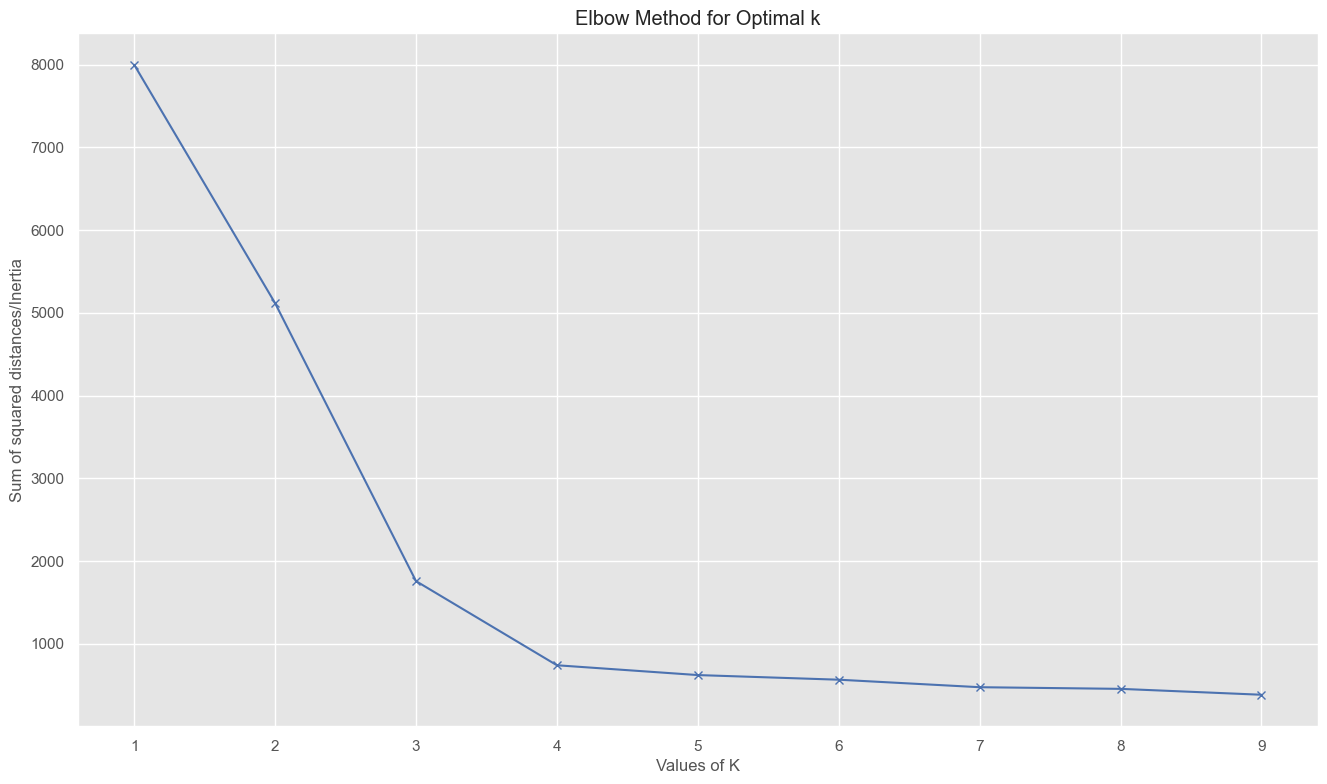

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(newdata)
sum_of_squared_distances = []
K=range(1,10)
for num_clusters in K:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_features)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

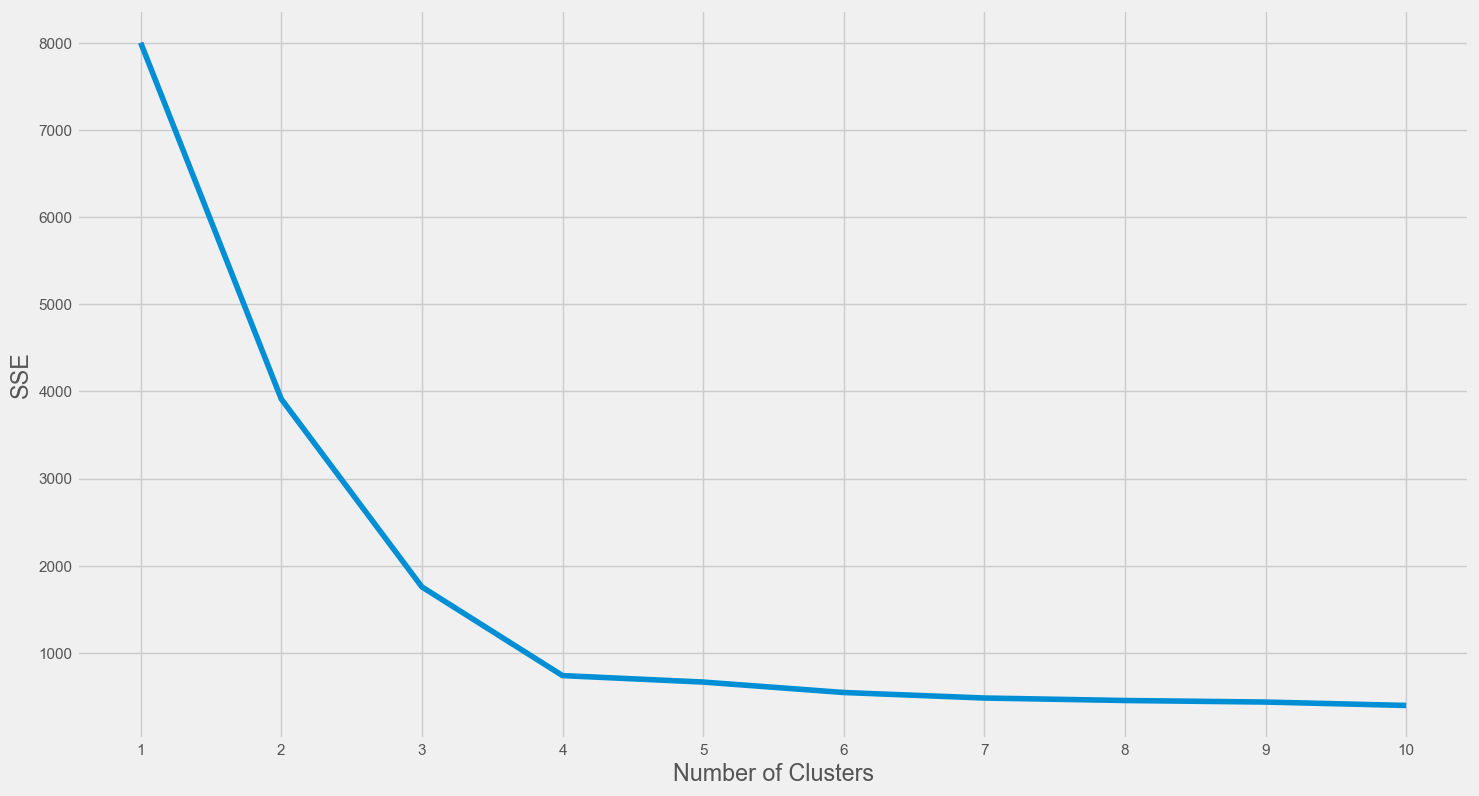

In [25]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 0,
   }
  
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
       kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
       kmeans.fit(scaled_features)
       sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

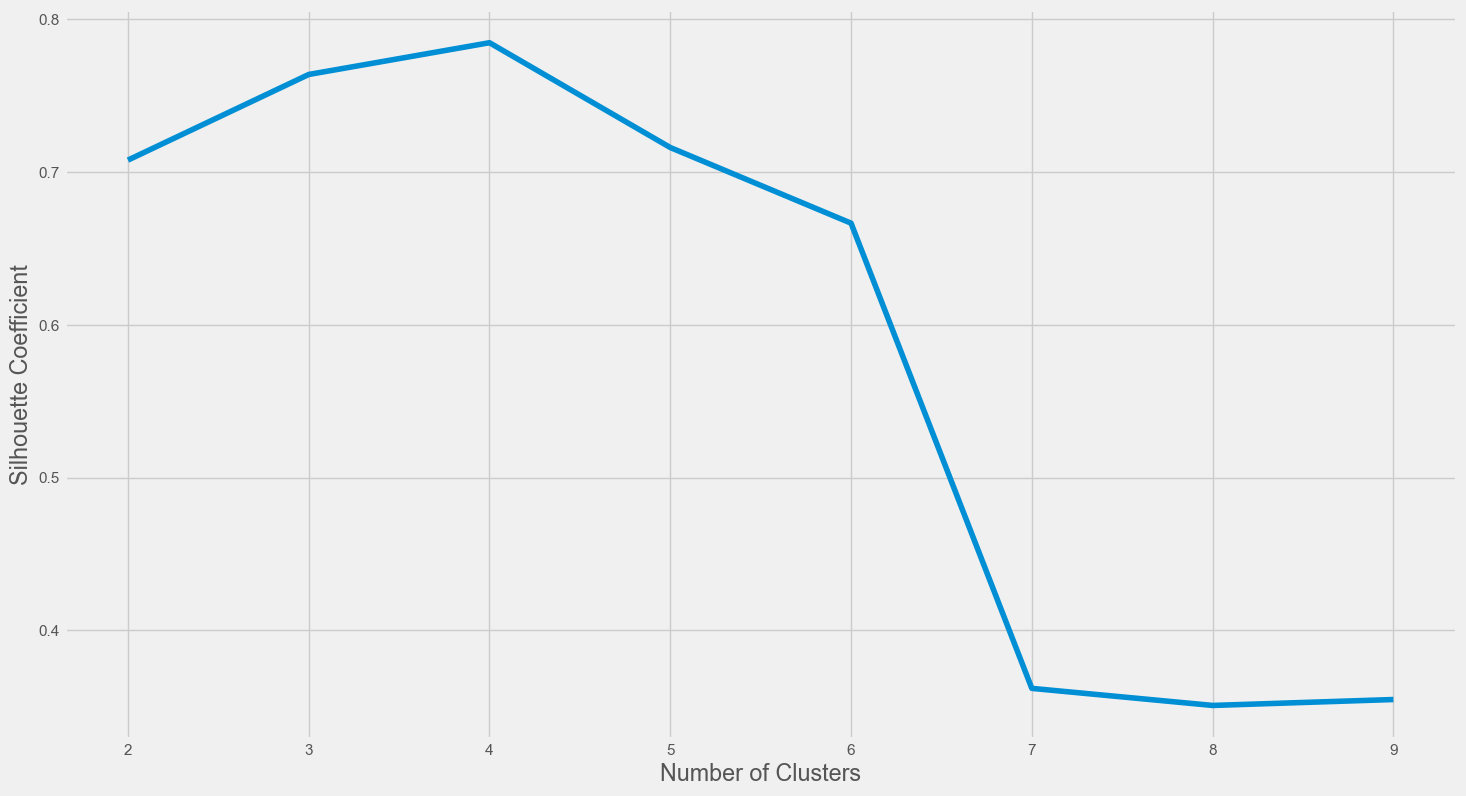

In [26]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [27]:
#Optimal number of clusters is 4 from both elbow and silhouette methods
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)
kmeans.fit(scaled_features)
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
kmeans_silhouette

0.78

In [28]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 427, 1: 695, 2: 104, 3: 2774}


In [29]:
# plot the data 
newdata['cluster'] = kmeans.labels_
newdata.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


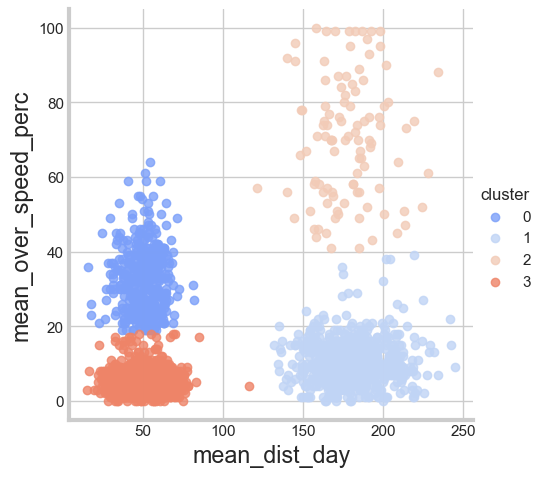

In [30]:
sns.set_style('whitegrid')
sns.lmplot(data=newdata,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster',
           palette='coolwarm',aspect=1,fit_reg=False)

In [31]:
newdata.sort_values(by='mean_dist_day', ascending=False).head()

,mean_dist_day,mean_over_speed_perc,cluster
3603,244.79,9,1
3613,242.37,15,1
3655,241.71,22,1
3228,234.52,88,2
3611,234.09,7,1


In [32]:
newdata.sort_values(by='mean_over_speed_perc', ascending=False).head()

,mean_dist_day,mean_over_speed_perc,cluster
3306,158.47,100,2
3312,182.53,99,2
3270,192.37,99,2
3245,164.13,99,2
3273,178.47,99,2


In [33]:
newdata.sort_values(by='mean_dist_day', ascending=True).head()

,mean_dist_day,mean_over_speed_perc,cluster
1099,15.52,3,3
291,16.05,36,0
2873,16.39,8,3
50,17.66,23,0
86,17.81,26,0


In [78]:
newdata.sort_values(by='mean_over_speed_perc', ascending=True).head()

,mean_dist_day,mean_over_speed_perc,cluster
3361,179.97,0,1
1866,28.70,0,3
1439,45.58,0,3
2001,48.91,0,3
2011,40.05,0,3


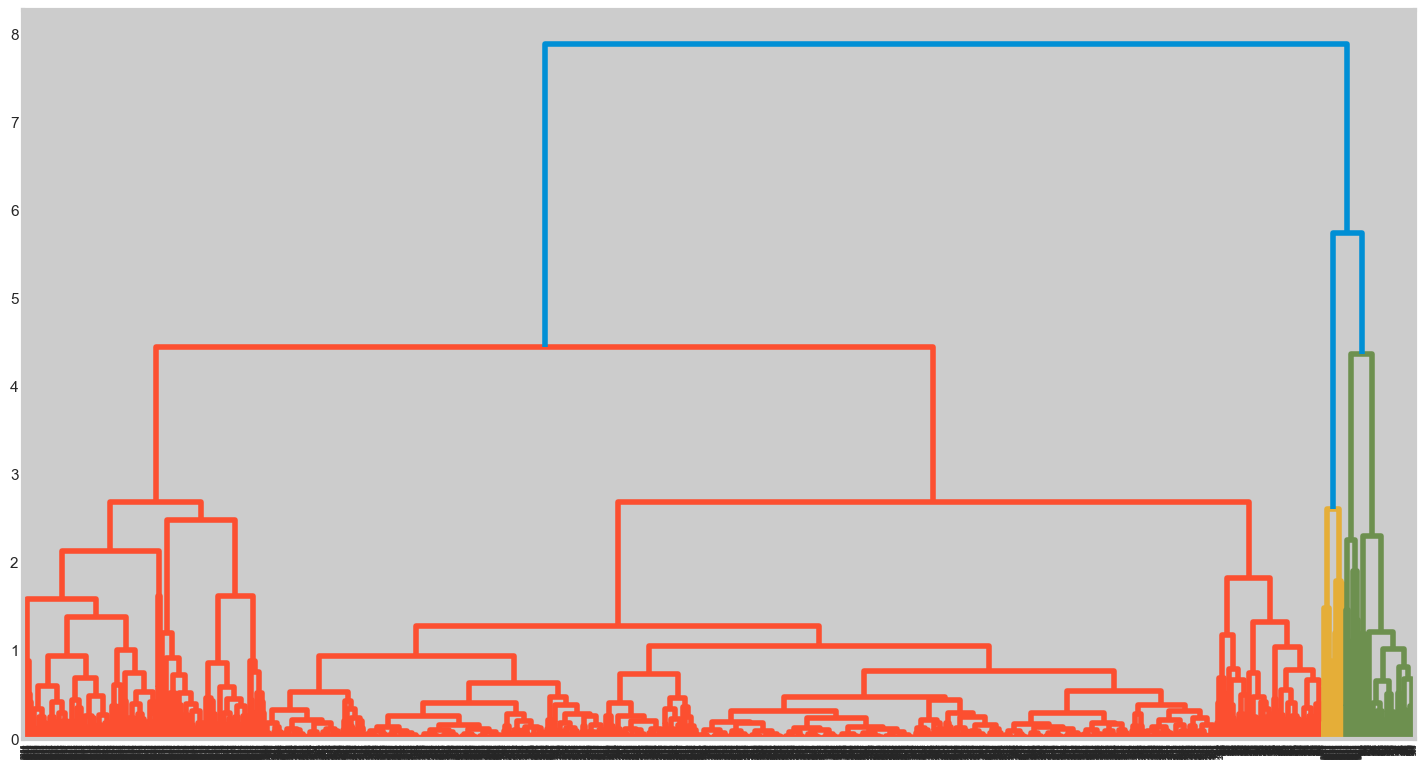

In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_features, method="complete", metric="euclidean")
average_clustering = linkage(scaled_features, method="average", metric="euclidean")
single_clustering = linkage(scaled_features, method="single", metric="euclidean")
dendrogram(complete_clustering)
plt.show()

In [ ]:
dendrogram(average_clustering)
plt.show()

In [ ]:
dendrogram(single_clustering)
plt.show()

In [ ]:
from scipy import cluster
cluster_labels = cluster.hierarchy.cut_tree(average_clustering, n_clusters=4).reshape(-1, )
df = pd.DataFrame(scaled_features, columns=['mean_dist_day', 'mean_over_speed_perc'])
df["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='mean_dist_day', data=df)

In [ ]:
sns.boxplot(x='Cluster', y='mean_over_speed_perc', data=df)